# Final Project Report

* Class: DS 5100
* Student Name: Venkat Viswanathan
* Student Net ID: dfe2zj
* This URL:https://github.com/venkatviswa/dfe2zj-ds5100-montecarlo/blob/master/montecarlo_demo.ipynb

# Instructions

Follow the instructions in the [Final Project](https://ontoligent.github.io/DS5100-2023-07-R/notebooks/M00_FinalProject/FinalProjectInstructions.html) isntructions and put your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL:
https://github.com/venkatviswa/dfe2zj-ds5100-montecarlo

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [7]:
```
import numpy as np
import pandas as pd
from itertools import combinations_with_replacement,groupby,permutations


class Die:
    '''Die has N sides or faces and W weights and can be rolled to select a face. Die with N = 2 is a coin and N = 6 is a standard die.
    Each dice has same number of sides and faces but can have its own weights. Each side has an equal number of weights.Each side has an unique symbol.
    Weight defaults to 1 for each side but can be changed afterr initialization. Die has one behavior which is to be rolled one or more times
    '''

    def __init__(self, faces):
        ''' initializer that takes a list of faces as input'''
        if not isinstance(faces, np.ndarray):
            raise TypeError('faces must be a numpy array')
        #print(faces.dtype)
        if faces.dtype == 'int64' or '<U' in faces.dtype.str:
            self.faces = faces
        else:
            raise TypeError('Data type of array must be integer or string')

       # if len(self.faces) != len(np.unique(self.faces)):
        #    raise ValueError('faces must have unique values')
        self.weights = [1.0 for i in faces]
        self.df = pd.DataFrame(data=self.weights, index=self.faces, columns=['weights'])

    def change_weights(self, face, new_weight):
        ''' method to change weights of one face to another
            Output : Method does not return anything
        '''
        if face not in self.faces:
            raise IndexError('face does not exist')
        try:
            self.df.loc[face, 'weights'] = float(new_weight)
        except ValueError:
            raise TypeError('new_weight must be a float')
        return None

    def roll_die(self, times=1):
        '''method to roll the dice n number of times and returns a list of outcomes
        Output : Returns list of outcomes in list format '''
        #print(list(self.df.sample(n=times,weights=self.weights,replace=True)))
        outcomeList = self.df.sample(n=times, weights=self.weights, replace=True).index.tolist()
        #print('after rolling dice')
        #print(outcomeList)
        return outcomeList

    def current_state(self):
        ''' returns the current state of the die'''
        return self.df


class Game:
    ''' Represents a Game which consists of rolling one or more dice one or more times. Each die should have the same
     number of sides and faces but each die can have its own weights.'''

    def __init__(self, diceList):
        ''' initalizes a game by a list of dice '''
        if (len(diceList) == 0):
            raise ValueError('Atleast one or more dice must be specified')
        self.diceList = diceList

    '''-   The data frame should be in wide format, i.e. have the roll number
as a named index, columns for each die number (using its list index
as the column name), and the face rolled in that instance in each
cell.'''

    def play(self, numtimes):
        ''' takes an integer that indicates how many times dice should be rolled
            Output : does not return any value
        '''
        columns = ['die' + str(i + 1) for i in range(len(self.diceList))]
        #print(columns)
        self.playdf = pd.DataFrame(columns=columns, index=[], data=[])
        self.playdf.index.name = 'rollnumber'
        #print(self.diceList)
        for dieindex, die in enumerate(self.diceList):
            #print('die number ' + str(dieindex + 1))
            #print(die.current_state())
            #print(die.roll_die(numtimes))
            outcomelist = die.roll_die(numtimes)
            #print(outcomelist)
            for rollindex, outcome in enumerate(outcomelist):
                #print('roll' + str(rollindex + 1), 'die' + str(dieindex + 1), outcome)
                self.playdf.loc['roll' + str(rollindex + 1), 'die' + str(dieindex + 1)] = outcome
        return None
    def show_game_result(self, format='wide'):
        """This method just returns a copy of the private play data frame to the user.
           Takes a parameter to return the data frame in narrow or wide form which defaults to wide form.
           The narrow form will have a MultiIndex, comprising the roll number and the die number (in that order),
           and a single column with the outcomes (i.e. the face rolled).
          This method should raise a ValueError if the user passes an invalid option for narrow or wide
          Output : Returns two types of dataframes based on need ( wide or narrow)
        """

        if format == 'wide':
            return self.playdf
        elif format == 'narrow':
            narrowdf = self.playdf.copy()
            narrowdf = self.playdf.stack().to_frame('val')
            return narrowdf
        else:
            raise ValueError('format must be either wide or narrow')


class Analyzer:
    ''' An Analyzer object takes the results of a single game and computes
various descriptive statistical properties about it.'''

    def all_equal(self,iterable):
        g = groupby(iterable)
        return next(g, True) and not next(g, False)

    def __init__(self, game):
        ''' initializes the Analyzer by passing a Game that was played recently to do analysis'''
        self.game = game
        if not isinstance(game, Game):
            raise ValueError('Not a game object')

    def jackpot(self):
        """A jackpot is a result in which all faces are the same, e.g. all ones
            for a six-sided die.Computes how many times the game resulted in a jackpot.
            Output :Returns an integer for the number of jackpots.
        """

        gamedf = self.game.show_game_result(format='wide')
        jackpotCount=0
        #print('printing row by row')
        for  row in gamedf.values.tolist():
            #print(row)
            if self.all_equal(iter(row)):
                #print('jackpot row ' + str(row))
                jackpotCount+=1
            #else:
                #print('non jackpot row ' + str(row))
        return jackpotCount

    def face_count_per_roll(self):
        '''Computes how many times a given face is rolled in each event.
           For example, if a roll of five dice has all sixes, then the counts for this roll would be   for the face value ‘6’ and   for the other faces.
           Returns a data frame of results.
           The data frame has an index of the roll number, face values as columns, and count values in the cells (i.e. it is in wide format)..
           Output : Returns a data frame of results.
        '''
        df2=self.game.show_game_result(format='narrow')
        #print('resetting index')
        df2.reset_index()
        #print('resetting index done')
        #print(df2.groupby("rollnumber").count())
        return df2.pivot_table(index="rollnumber",columns="val",aggfunc='size',fill_value=0)
        #return self.game.show_game_result('narrow').reset_index().set_index("rollnumber").pivot_table(values="rollnumber",columns=["val"],aggfunc=np.sum)

    def combo_count(self):
        '''A combo count method.
            Computes the distinct combinations of faces rolled, along with their counts.
            Combinations are order-independent and may contain repetitions.
            Returns a data frame of results.
            The data frame should have an MultiIndex of distinct combinations and a column for the associated counts.
            Output : Returns a data frame of results.
        '''
        combo_copy = self.game.show_game_result().copy()
        #print(combo_copy)
        #print(combo_copy.values.tolist())
        combinations=combinations_with_replacement(combo_copy.values.tolist(),1)
        resultdf=pd.DataFrame(columns=['Combination','Count'],data=[])
        for combo in combinations:
            #print(combo[0])
            values_series = pd.Series(combo[0], index=combo_copy.columns)
            mask = combo_copy.apply(lambda row: all(row == values_series), axis=1)
            row_values_count = mask.sum()
            resultdf.loc[len(resultdf.index)]= {'Combination':combo[0],'Count':row_values_count}
        return resultdf

    def permutation_count(self):
        '''An permutation count method.
            Computes the distinct permutations of faces rolled, along with their counts.
            Permutations are order-dependent and may contain repetitions.
            Returns a data frame of results.
            The data frame should have an MultiIndex of distinct permutations and a column for the associated counts
            Output : Returns a data frame of results.
        '''
        perm_copy = self.game.show_game_result().copy()
        gameresult=self.game.show_game_result()
        gameresultkeys=gameresult.columns.tolist()
        resultdf = pd.DataFrame(self.game.show_game_result().value_counts(gameresultkeys).sort_index())
        return resultdf


if __name__ == "__main__":

    #dieArray = np.array(['head', 'tail'])

    dieArray = np.array([1,2,3,4,5,6])
    die1 = Die(dieArray)
    #print(die1.roll_die(3))
    #die1.change_weights('head', 2)
    die1.change_weights(6, 5)
    #print(die1.roll_die(3))
    #print(die1.roll_die(3))
    die2 = Die(dieArray)
    die2.change_weights(6, 5)
    die3 = Die(dieArray)
    die3.change_weights(6, 5)
    list = [die1, die2, die3]
    print("Game starting with 3 dices and 10 rounds")
    g = Game(list)
    g.play(10)
    print("result in wide format")
    print(g.show_game_result(format='wide'))

    print("Result in narrow format")
    print(g.show_game_result(format='narrow'))

    analyzer = Analyzer(g)
    print("checking for jackpots")
    print(analyzer.jackpot())
    print("checking for face counts per roll")
    print(analyzer.face_count_per_roll())
    print("checking unique combinations")
    print(analyzer.combo_count())
    print("checking Permutations")
    print(analyzer.permutation_count())
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

In [9]:
```
import unittest
import numpy as np
import pandas as pd

from Montecarlo.montecarlo import Die, Game, Analyzer


class DieTestCase(unittest.TestCase):

    def test_init(self):
        die=Die(np.array([1,2,3,4,5,6]))
        self.assertTrue(len(die.faces)==6)
    def test_change_weights(self):
        die = Die(np.array([1,2,3,4,5,6]))
        die.change_weights(3,0.5)
        self.assertTrue(die.current_state().loc[3,'weights']==0.5)
    def test_roll_die(self):
        die = Die(np.array([1, 2, 3, 4, 5, 6]))
        outcome=die.roll_die(3)
        self.assertTrue(len(outcome)==3)
    def test_current_state(self):
        die = Die(np.array([1, 2, 3, 4, 5, 6]))
        self.assertTrue(die.current_state is not None)

class GameTestCase(unittest.TestCase):
    def setUp(self):
        dieArray = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(dieArray)
        die1.change_weights(6, 5)
        die2 = Die(dieArray)
        die2.change_weights(6, 5)
        die3 = Die(dieArray)
        die3.change_weights(6, 5)
        self.list = [die1, die2, die3]
        self.g = Game(self.list)

    def test_init(self):
        dieArray = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(dieArray)
        die1.change_weights(6, 5)
        die2 = Die(dieArray)
        die2.change_weights(6, 5)
        die3 = Die(dieArray)
        die3.change_weights(6, 5)
        list = [die1, die2, die3]
        self.g = Game(self.list)
        self.assertEqual(len(self.g.diceList),len(list))

    def test_play(self):
        self.g.play(5)
        self.assertTrue(len(self.g.playdf.values.tolist())==5)

    def test_show_game_result(self):
        self.g.play(5)
        gamedef=self.g.show_game_result(format='wide')
        num_rows, num_cols = gamedef.shape
        self.assertEqual(num_rows, 5)
        self.assertEqual(num_cols, 3)

class AnalyzerTestCase(unittest.TestCase):
    def setUp(self):
        dieArray = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(dieArray)
        die1.change_weights(6, 5)
        die2 = Die(dieArray)
        die2.change_weights(6, 5)
        die3 = Die(dieArray)
        die3.change_weights(6, 5)
        list = [die1, die2, die3]
        self.g = Game(list)
        self.g.play(10)

    def test_init(self):
        analyzer = Analyzer(self.g)
        self.assertIsNotNone(analyzer.game)
    def test_jackpot(self):
        analyzer = Analyzer(self.g)
        jackpotCount=analyzer.jackpot()
        self.assertTrue(jackpotCount>=0)

    def test_face_count_per_roll(self):
        analyzer = Analyzer(self.g)
        resultdf=analyzer.face_count_per_roll()
        num_rows, num_cols = resultdf.shape
        self.assertEqual(num_rows, 10)
        self.assertEqual(num_cols, 6)

    def test_combo_count(self):
        analyzer = Analyzer(self.g)
        resultdf=analyzer.combo_count()
        num_rows, num_cols = resultdf.shape
        self.assertEqual(num_rows, 10)
        self.assertEqual(num_cols, 2)

    def test_permutation_count(self):
        analyzer = Analyzer(self.g)
        resultdf=analyzer.permutation_count()
        self.assertIsNotNone(resultdf)



if __name__ == '__main__':
    unittest.main()

```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [100]:
import Montecarlo.montecarlo as montecarlo

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [102]:
help(montecarlo)

Help on module Montecarlo.montecarlo in Montecarlo:

NAME
    Montecarlo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  An Analyzer object takes the results of a single game and computes
     |  various descriptive statistical properties about it.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  all_equal(self, iterable)
     |  
     |  combo_count(self)
     |      A combo count method.
     |      Computes the distinct combinations of faces rolled, along with their counts.
     |      Combinations are order-independent and may contain repetitions.
     |      Returns a data frame of results.
     |      The data frame should have an MultiIndex of distinct combinations and a column for the associated counts.
     |  
     |  face_count_per_roll(self)
 

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL:https://github.com/venkatviswa/dfe2zj-ds5100-montecarlo/blob/master/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

In [104]:
from Montecarlo.montecarlo import Die, Game, Analyzer
import numpy as np
import pandas as pd

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [106]:
arr=np.array(['H','T'])
coin1=Die(arr)
coin2=Die(arr)
coin2.change_weights('H',5)
coin2.change_weights('T',1)
coin1.current_state()

,weights
H,1.0
T,1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [108]:
list=[coin1,coin2]
g1=Game(list)
g1.play(1000)
#g1.show_game_result(format='wide')

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [110]:
list=[coin1,coin2,coin2]
g2=Game(list)
g2.play(1000)
#g2.show_game_result(format='wide')

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [112]:
analyzer1=Analyzer(g1)
analyzer2=Analyzer(g2)
print(analyzer1.jackpot(),analyzer2.jackpot())


489 245


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [116]:
totalRolls=1000
rFreq1=analyzer1.jackpot()/totalRolls
rFreq2=analyzer2.jackpot()/totalRolls
print(rFreq1,rFreq2)

0.489 0.245


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

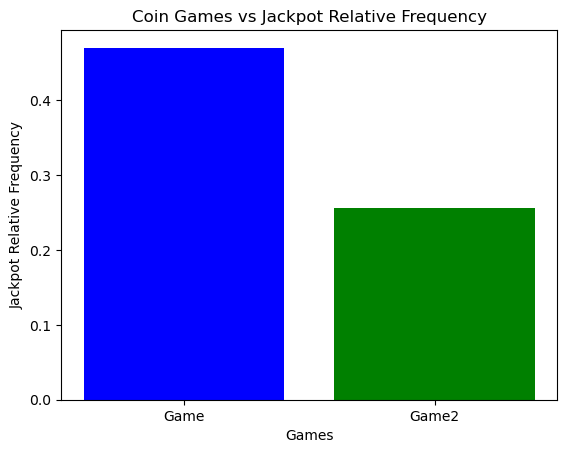

In [118]:
import matplotlib.pyplot as plot


total_rolls = 1000
relative_frequency1 = 0.47
relative_frequency2 = 0.256


labels = ['Game', 'Game2']


heights = [relative_frequency1, relative_frequency2]


plot.bar(labels, heights, color=['blue', 'green'])


plot.title('Coin Games vs Jackpot Relative Frequency')
plot.xlabel('Games')
plot.ylabel('Jackpot Relative Frequency')


plot.show()


## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [120]:
arr=np.array([1,2,3,4,5,6])
die1=die2=die3=Die(arr)

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [122]:
die3.change_weights(6,5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [124]:
die2.change_weights(1,5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [126]:
list=[die1,die1,die1,die1,die1]
g3=Game(list)
g3.play(10000)
#g3.show_game_result(format='wide')

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [128]:
list=[die2,die3,die1,die1,die1]
g4=Game(list)
g4.play(10000)
#g4.show_game_result(format='wide')

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

6 7
0.0006 0.0007


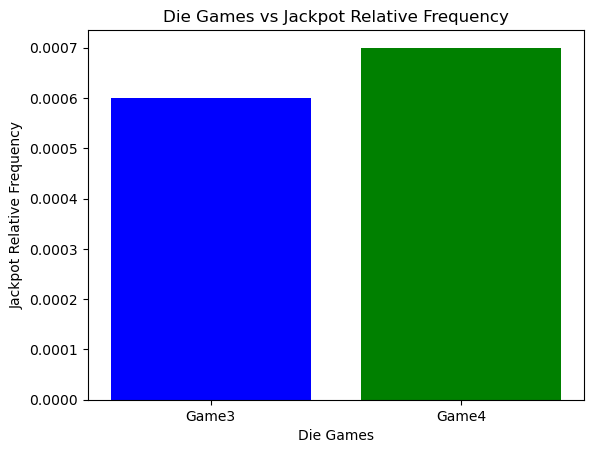

In [130]:
analyzer3=Analyzer(g3)
analyzer4=Analyzer(g4)
print(analyzer3.jackpot(),analyzer4.jackpot())
totalRolls=10000
rFreq3=analyzer3.jackpot()/totalRolls
rFreq4=analyzer4.jackpot()/totalRolls
print(rFreq3,rFreq4)


labels = ['Game3', 'Game4']


heights = [rFreq3,rFreq4]


plot.bar(labels, heights, color=['blue', 'green'])


plot.title('Die Games vs Jackpot Relative Frequency')
plot.xlabel('Die Games')
plot.ylabel('Jackpot Relative Frequency')


plot.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [132]:
alphadf=pd.read_csv('./english_letters.txt',skipinitialspace=True,header=None)
alphadf=alphadf.set_index(alphadf.columns[0])
alphadf.dtypes


1    int64
dtype: object

In [134]:
alpharr=np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M',
                  'N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])
alphaDie=Die(alpharr)
alphaDie.current_state()

,weights
A,1.0
B,1.0
C,1.0
D,1.0
E,1.0
F,1.0
G,1.0
H,1.0
I,1.0
J,1.0


In [136]:
for j in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ':
    #lphadf.loc[j]
    alphaDie.change_weights(j,alphadf.loc[j,1])
print(alphaDie.current_state())    

       weights
A  374061888.0
B   70195826.0
C  138416451.0
D  169330528.0
E  529117365.0
F   95422055.0
G   91258980.0
H  216768975.0
I  320410057.0
J    9613410.0
K   35373464.0
L  183996130.0
M  110504544.0
N  313720540.0
O  326627740.0
P   90376747.0
Q    4550166.0
R  277000841.0
S  294300210.0
T  390965105.0
U  117295780.0
V   46337161.0
W   79843664.0
X    8369915.0
Y   75294515.0
Z    4975847.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [138]:
list=[alphaDie,alphaDie,alphaDie,alphaDie]
g5=Game(list)
g5.play(1000)
g5.show_game_result(format='wide')

,die1,die2,die3,die4
rollnumber,,,,
roll1,U,X,J,G
roll2,V,R,Y,V
roll3,C,F,N,S
roll4,N,G,K,I
roll5,R,I,P,E
...,...,...,...,...
roll996,R,T,J,P
roll997,S,D,A,X
roll998,Q,N,V,O


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [140]:
analyzer5=Analyzer(g5)
permdf=analyzer5.permutation_count()
newdf=permdf.reset_index()
newdf['concatcol']=newdf[['die1','die2','die3','die4']].apply(lambda x:x.die1+x.die2+x.die3+x.die4,axis=1)
newdfset=set(newdf['concatcol'].values.tolist())



In [156]:
scrabbledf=pd.read_table('./scrabble_words.txt',header=None)
scrabbleset=set(scrabbledf[0].values.tolist())
print(scrabbleset.intersection(newdfset))
len(scrabbleset.intersection(newdfset))


{'ICHS', 'AUNE', 'SAIS', 'ZZZS', 'AWRY', 'SORE', 'WADT', 'APTS'}


8

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [158]:
list=[alphaDie,alphaDie,alphaDie,alphaDie,alphaDie]
g6=Game(list)
g6.play(1000)
g6.show_game_result(format='wide')
analyzer6=Analyzer(g6)
permdf=analyzer6.permutation_count()
newdf=permdf.reset_index()
newdf['concatcol']=newdf[['die1','die2','die3','die4','die5']].apply(lambda x:x.die1+x.die2+x.die3+x.die4,axis=1)
newdfset=set(newdf['concatcol'].values.tolist())
scrabbledf=pd.read_table('./scrabble_words.txt',header=None)
scrabbleset=set(scrabbledf[0].values.tolist())
print(scrabbleset.intersection(newdfset))
print(len(scrabbleset.intersection(newdfset)))
print("5 die option produces more words compared to previous option with 4 die")

{'ESPY', 'JAPS', 'DIVO', 'RONG', 'FYLE', 'ACAI', 'MONG', 'YAGI', 'UNAI', 'GINK', 'SPIE', 'BOTS', 'BOLD', 'TURM', 'TROP'}
15
5 die option produces more words compared to previous option with 4 die


# Submission

When finished completing the above tasks, save this file to your local repo (and within your project), and them push it to your GitHub repo.

Then convert this file to a PDF and submit it to GradeScope according to the assignment instructions in Canvas.